In [1]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import sys
sys.path.append('../')
from src import data_cleaner, data_loader, features

In [2]:
# Load data
df = data_loader.load_single_file("../data/raw/AEP_hourly.csv")

In [3]:
# Check for empty values and fix them
if df.isna().sum().iloc[0]!=0:
    print("There are missing values")
    df=data_cleaner.fill_values(df)     # Fix missing values
    print("Missing values fixed")
else:
    print("There are no missing values")
print("=====================================================")

# Check for frequency of the Dataframe and make it regular
if df.index.inferred_freq==None:
    freq_std=df.index.to_series().diff().std()
    if freq_std!=0:
        print("The frequencies are irregular")
        print("-----------------------------------------------------")
        print("Average frequency:", df.index.to_series().diff().mean())
        print("Most common frequency:", df.index.to_series().diff().mode()[0])
        print("Standard deviation of the frequencies:", freq_std)
        print("-----------------------------------------------------")

        # Make frequency regular
        print("Making frequencies regular:")
        df=data_cleaner.fix_time_irregularities(df)
        print("The frequencies are now regular and their value is:", df.index.to_series().diff().mean())
    else:
        print("The frequencies are regular and their value is:", df.index.to_series().diff().mean())      
else:
    print("The frequencies are regular and their value is:", df.index.to_series().diff().mean())

There are no missing values
The frequencies are irregular
-----------------------------------------------------
Average frequency: 0 days 01:00:00.682762715
Most common frequency: 0 days 01:00:00
Standard deviation of the frequencies: 0 days 00:00:57.553840747
-----------------------------------------------------
Making frequencies regular:
The frequencies are now regular and their value is: 0 days 01:00:00


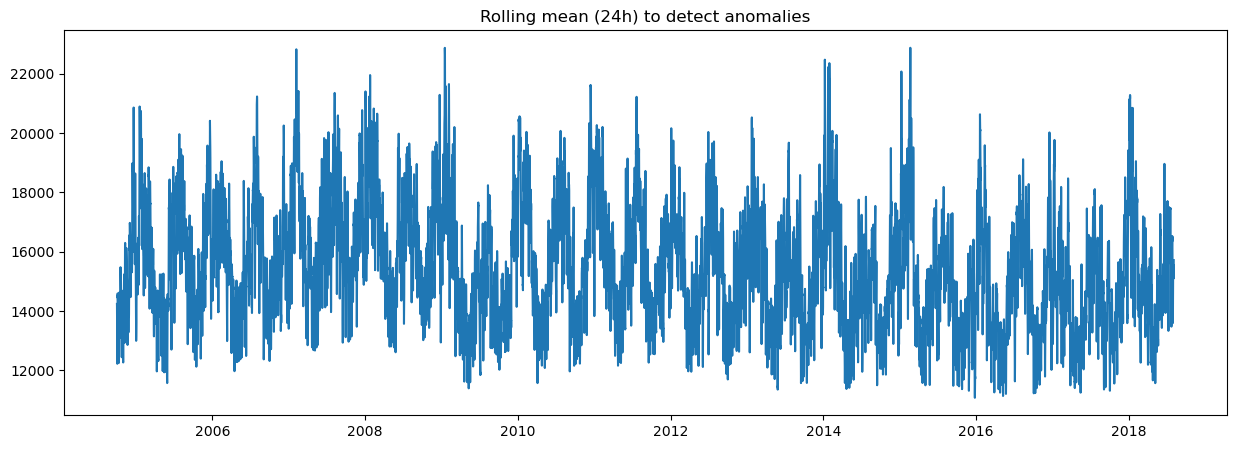

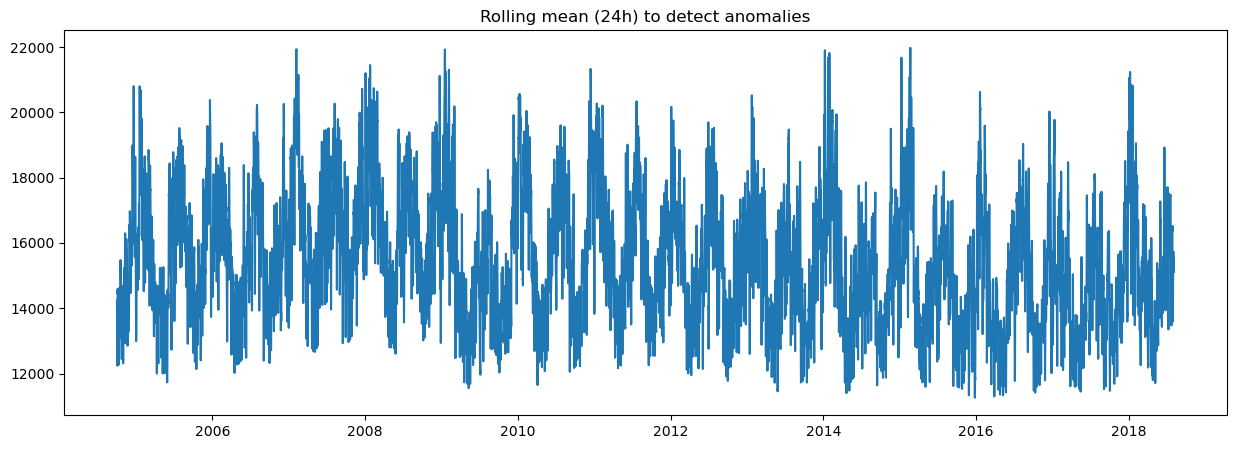

In [4]:
# Plot data to check for anomalies
plt.figure(figsize=(15,5))
plt.plot(df["AEP_MW"].rolling(24).mean())
plt.title("Rolling mean (24h) to detect anomalies")
plt.show()

# Data with fixed anomalies
data_cleaner.fix_anomalies(df, "AEP_MW");

In [5]:
# Comment the next line if you think that there were no anomalies and do not want the Dataframe to be changed
df=data_cleaner.fix_anomalies(df, "AEP_MW", False)

# Normalize data (necessary for some models)
scaler = MinMaxScaler()
df["AEP_MW_scaled"] = scaler.fit_transform(df[["AEP_MW"]])

# Create temporal features
df = features.add_time_features(df, target_col="AEP_MW_scaled", n_lags=24)

# Save processed data
processed_dir = "../data/processed"
df.to_csv(f"{processed_dir}/AEP_hourly_processed.csv")